In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
room = pd.read_csv('mushroom.csv')

In [3]:
room

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
room.shape

(2000, 26)

In [5]:
rooms = room.copy()

In [6]:
rooms.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [7]:
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [8]:
rooms.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [9]:
rooms.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


There is no null-values in the above dataset.

In [10]:
rooms.duplicated().sum()

1024

In [11]:
rooms.drop_duplicates(inplace=True)

In [12]:
rooms.duplicated().sum()

0

In [13]:
rooms.shape

(976, 26)

In [14]:
rooms['class'].value_counts()

,count
class,
poisonous,618
edible,358


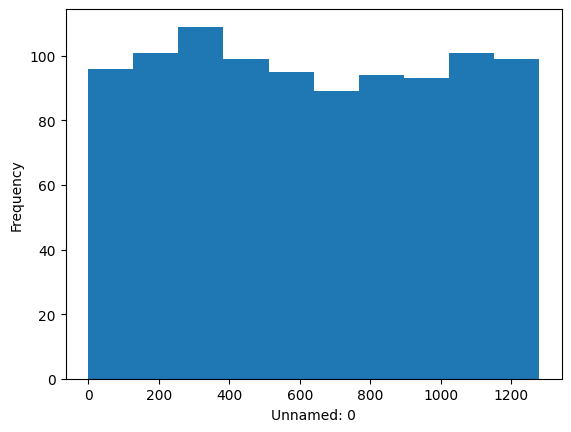

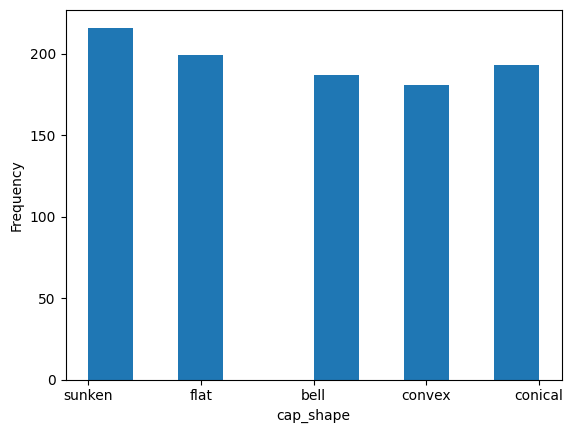

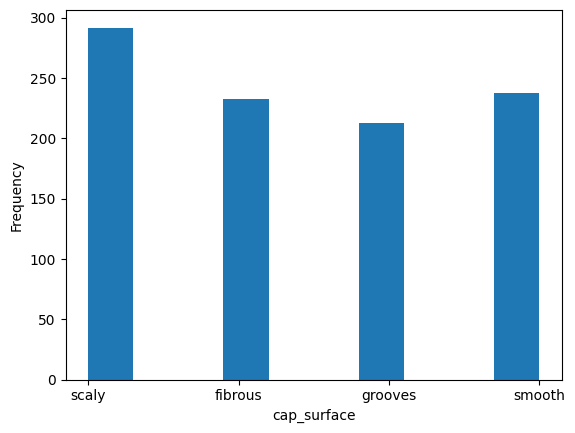

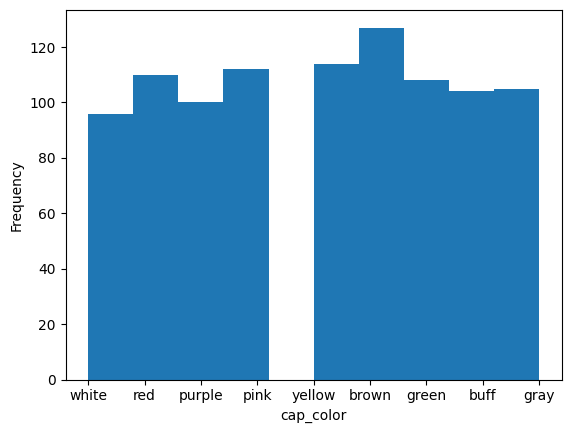

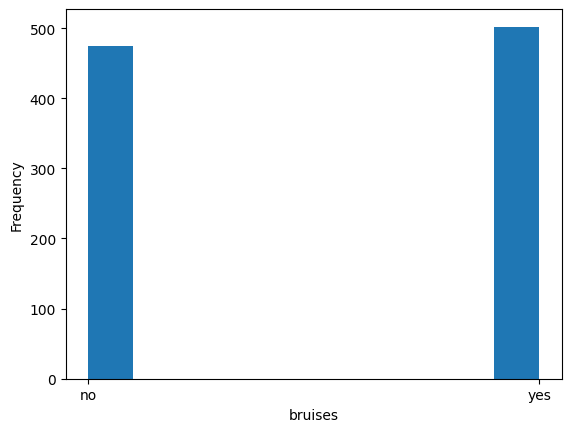

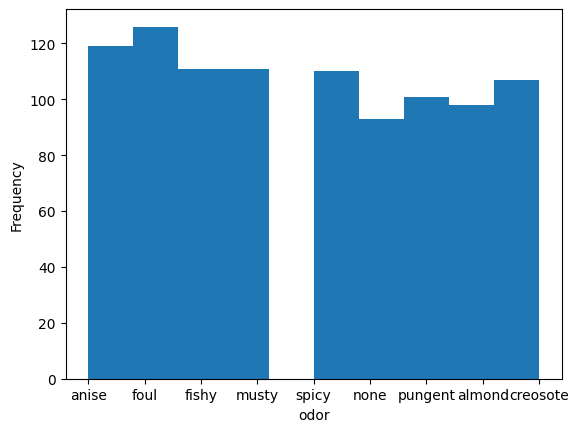

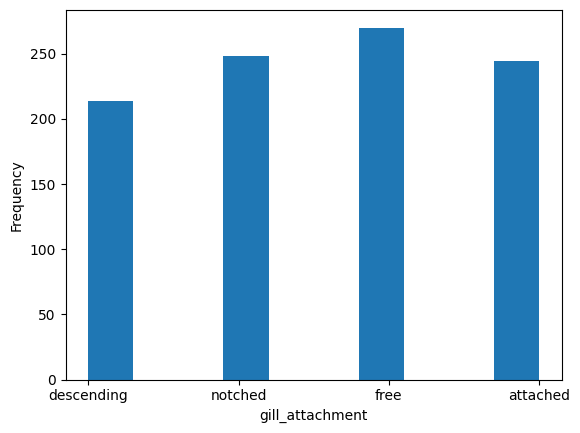

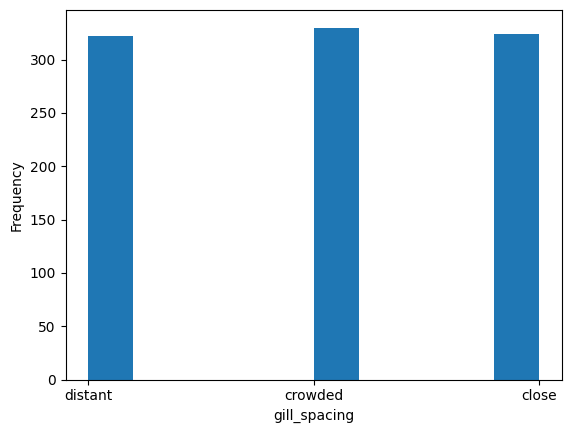

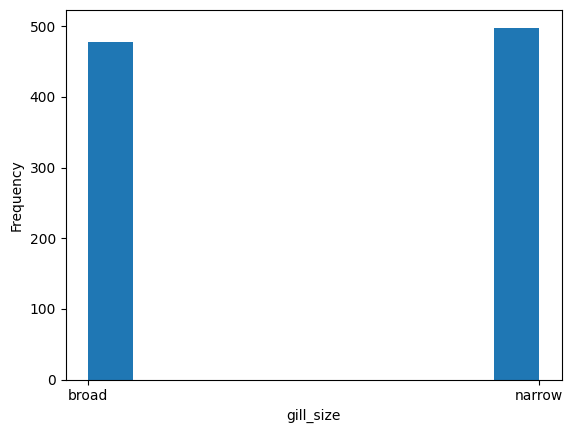

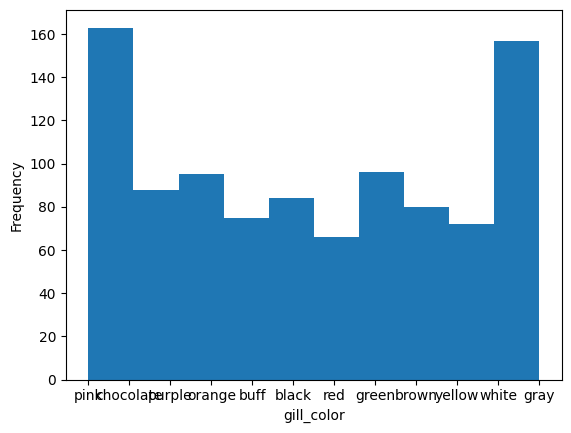

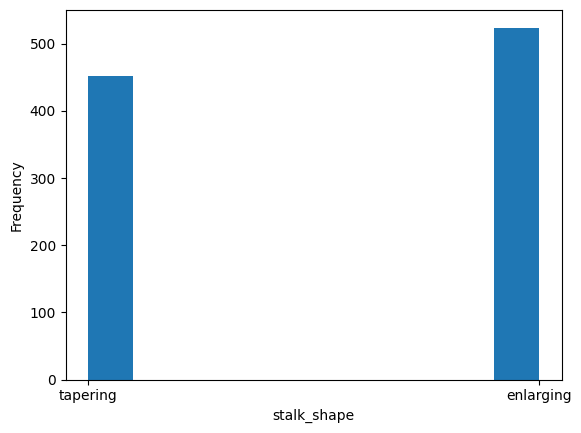

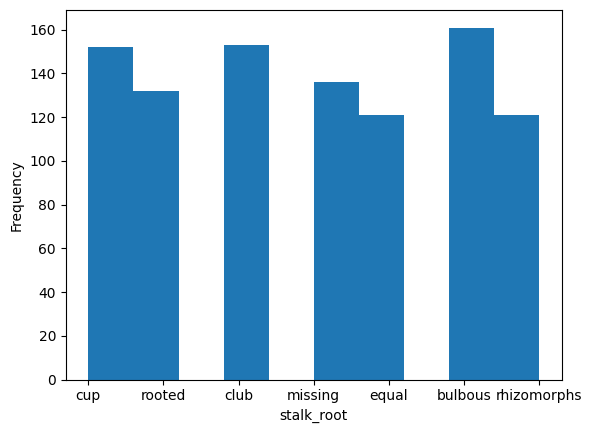

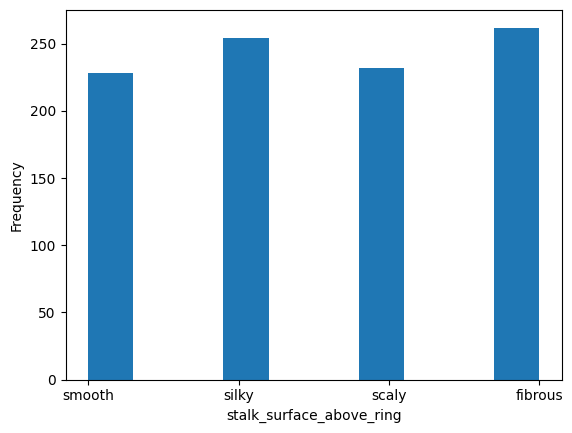

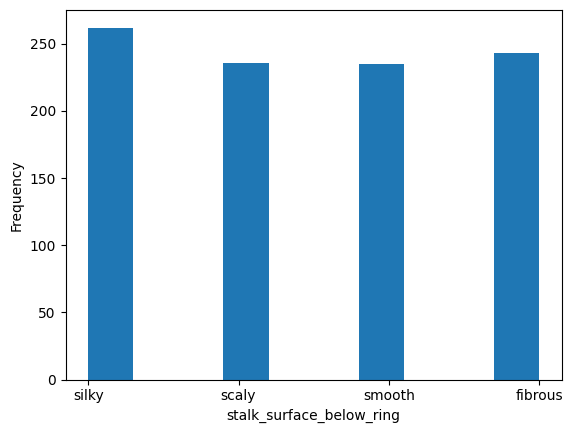

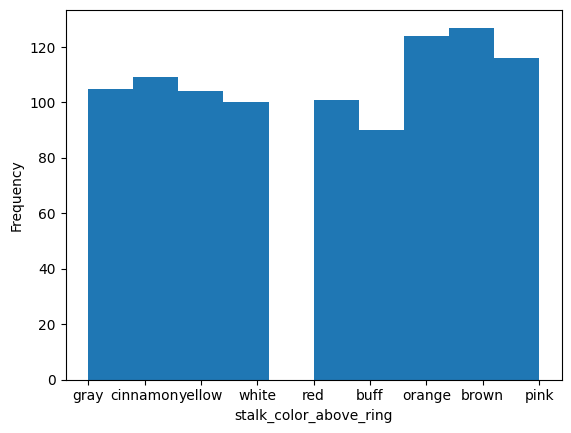

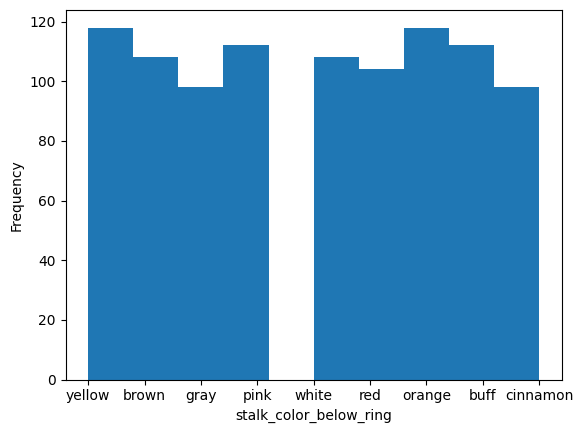

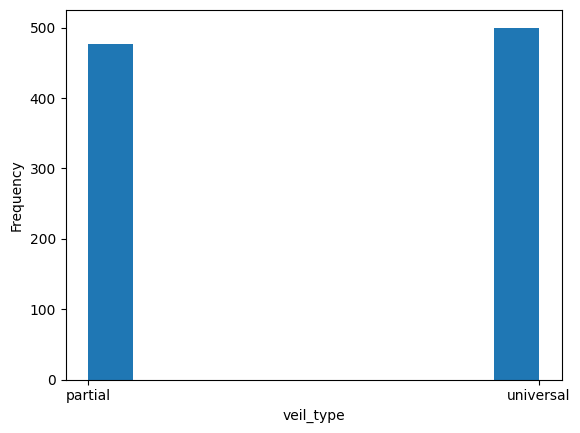

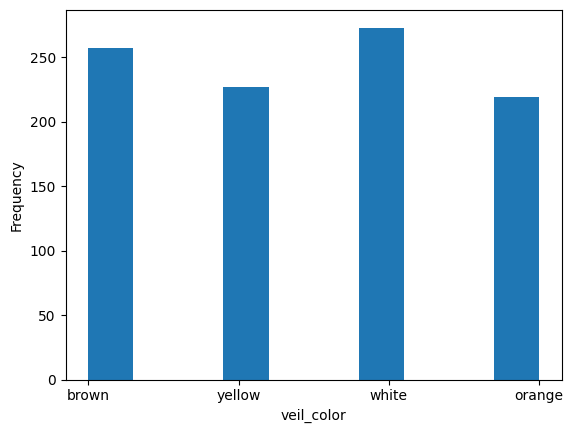

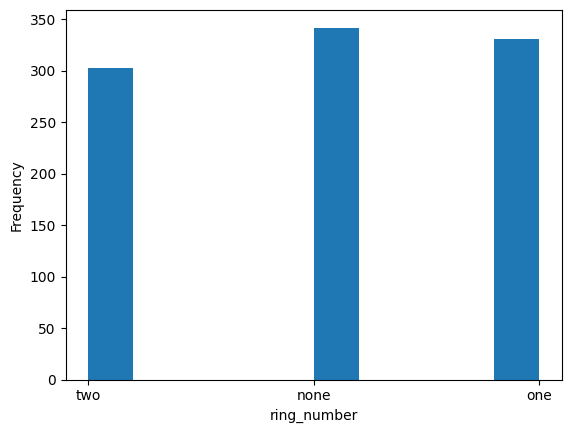

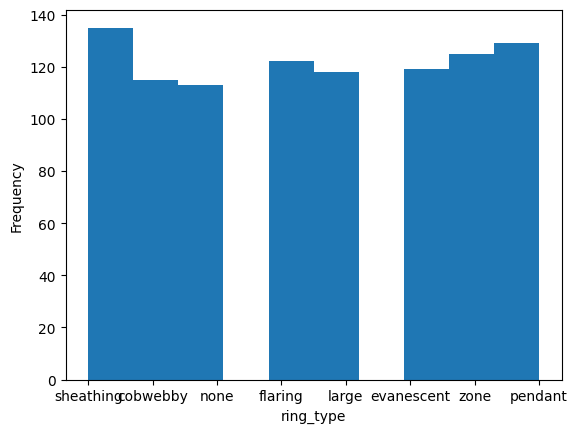

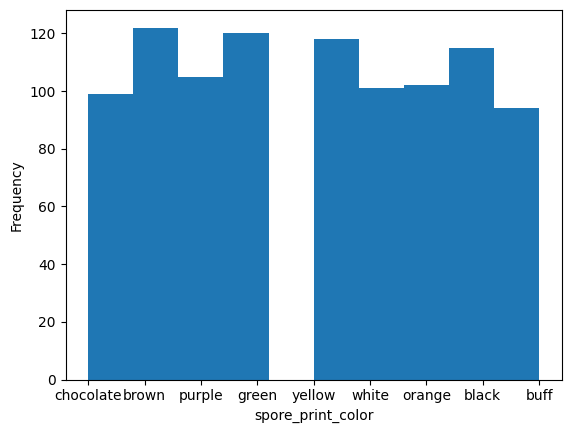

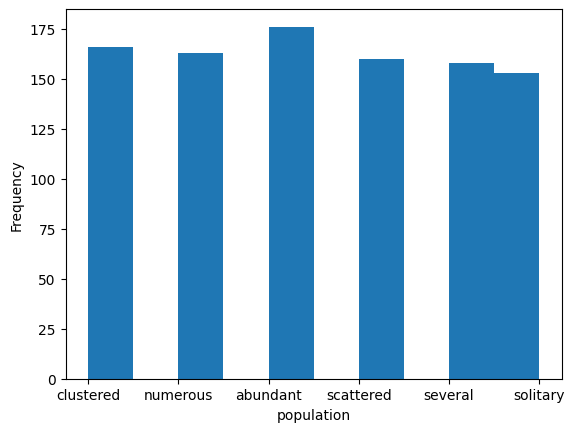

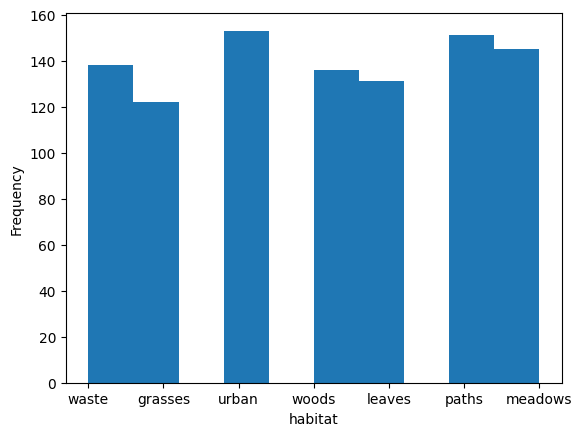

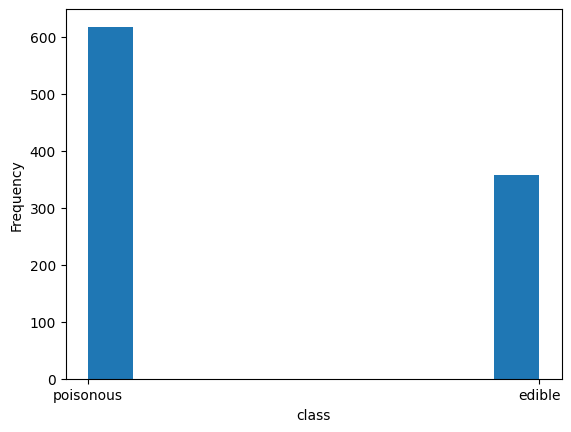

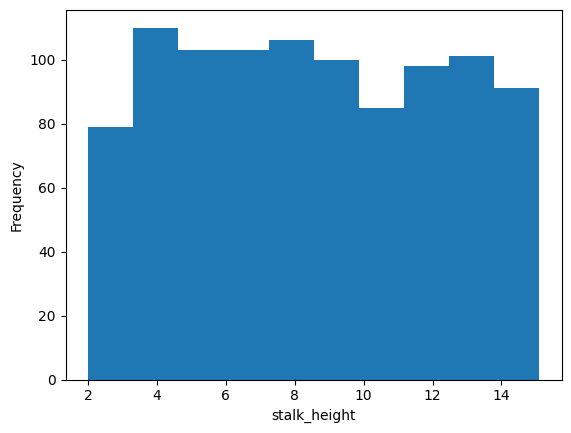

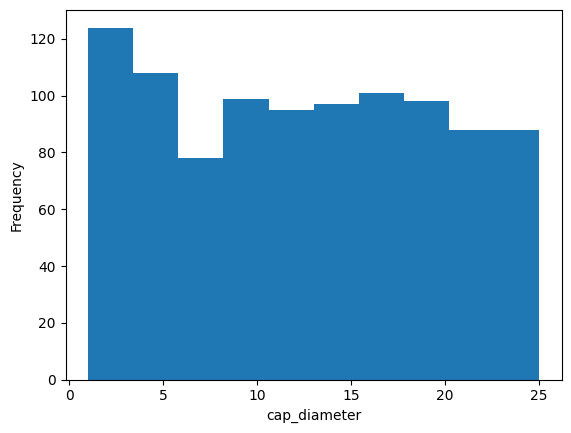

In [15]:
for i in rooms.columns:
    plt.hist(rooms[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.figure.size = (5,5)
    plt.show()

In [16]:
rooms.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [17]:
array = rooms.values
X = array[:,0:26]
Y = array[:,25]

In [18]:
# Identify string columns and convert them to numerical
for col in rooms.columns:
    if rooms[col].dtype == 'object':  # Check if column is of type object (string)
        le = LabelEncoder()
        rooms[col] = le.fit_transform(rooms[col])

In [19]:
'''import seaborn as sns # Import the seaborn library

sns.pairplot(rooms)
plt.show()'''

'import seaborn as sns # Import the seaborn library\n\nsns.pairplot(rooms)\nplt.show()'

In [20]:
rooms.corr()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.002662,-0.025126,0.040939,-0.019980,-0.018715,-0.016446,0.043219,0.025476,0.018908,...,0.032241,0.003575,-0.068662,-0.000326,-0.004192,0.007227,0.033891,0.021431,0.000815,0.042726
cap_shape,-0.002662,1.000000,0.024645,0.020694,-0.007043,-0.035072,0.017091,-0.026279,0.017675,0.050239,...,-0.015447,-0.004381,0.038398,0.012335,0.008641,0.009890,-0.003017,0.008132,-0.019087,0.015284
cap_surface,-0.025126,0.024645,1.000000,0.010129,-0.013355,-0.001229,-0.008412,0.033273,-0.046493,0.033423,...,-0.042954,0.027026,0.005017,0.002838,-0.057301,-0.026943,-0.038786,-0.047799,0.026016,0.030579
cap_color,0.040939,0.020694,0.010129,1.000000,0.007862,-0.056524,0.000201,0.001367,0.034965,0.005884,...,-0.008664,-0.027817,0.037536,0.023527,0.045805,-0.039548,-0.006857,-0.048735,0.026948,0.006289
bruises,-0.019980,-0.007043,-0.013355,0.007862,1.000000,0.051111,0.006422,-0.017566,-0.004689,-0.033166,...,0.007497,-0.023444,-0.037722,-0.067596,-0.028591,0.014990,0.011681,-0.007932,0.067729,-0.049061
odor,-0.018715,-0.035072,-0.001229,-0.056524,0.051111,1.000000,-0.013212,-0.030698,-0.057671,-0.030782,...,0.022875,0.033718,-0.031397,0.005064,-0.078276,-0.000816,-0.021675,0.009625,-0.002972,-0.043273
gill_attachment,-0.016446,0.017091,-0.008412,0.000201,0.006422,-0.013212,1.000000,-0.024634,-0.011606,0.026293,...,-0.044643,-0.005227,0.048239,-0.049124,-0.020564,0.003722,-0.020783,-0.023758,-0.002778,-0.012882
gill_spacing,0.043219,-0.026279,0.033273,0.001367,-0.017566,-0.030698,-0.024634,1.000000,0.012648,-0.004135,...,-0.027653,-0.003433,0.009182,0.008323,0.023472,0.005042,0.024691,0.045121,0.006502,0.034553
gill_size,0.025476,0.017675,-0.046493,0.034965,-0.004689,-0.057671,-0.011606,0.012648,1.000000,-0.022993,...,-0.041509,-0.005179,-0.022972,0.005937,0.033767,0.002667,0.014063,0.019853,-0.017483,-0.029404
gill_color,0.018908,0.050239,0.033423,0.005884,-0.033166,-0.030782,0.026293,-0.004135,-0.022993,1.000000,...,-0.024141,-0.011001,-0.021489,0.019591,0.005718,0.024611,0.014710,-0.000277,0.025211,-0.008795


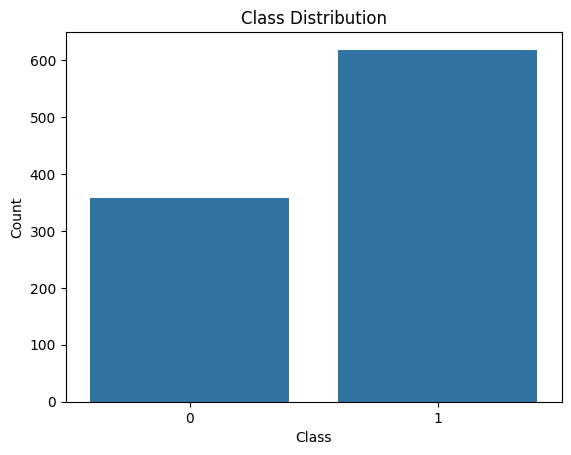

In [21]:
sns.countplot(x='class', data=rooms)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Model Building**

In [22]:
import pandas as pd

array = rooms.values
s = pd.DataFrame(array[:,0:23])  # Convert s to DataFrame
x = pd.DataFrame(array[:,24:26]) # Convert x to DataFrame
X = pd.concat([s, x], axis=1)
Y = array[:, 23]   # Target variable (assuming it's in the 25th column - Python uses zero-based indexing)

In [23]:
Y

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1.

In [24]:
X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,0,1
0,1167.0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,...,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0,14.276173,5.054983
1,1037.0,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,...,0.0,1.0,0.0,2.0,6.0,1.0,2.0,5.0,3.952715,19.068319
2,309.0,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,...,3.0,1.0,3.0,2.0,6.0,6.0,0.0,5.0,9.054265,7.205884
3,282.0,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,...,5.0,0.0,3.0,2.0,0.0,4.0,1.0,0.0,5.226499,20.932692
4,820.0,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,...,7.0,1.0,2.0,0.0,4.0,8.0,1.0,4.0,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,877.0,1.0,1.0,0.0,0.0,4.0,3.0,1.0,0.0,3.0,...,8.0,1.0,0.0,0.0,3.0,1.0,2.0,3.0,13.020616,9.993008
972,926.0,0.0,1.0,4.0,1.0,1.0,1.0,2.0,0.0,1.0,...,5.0,0.0,0.0,2.0,5.0,8.0,2.0,0.0,3.751597,18.868135
973,289.0,4.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0,...,6.0,1.0,1.0,2.0,4.0,5.0,0.0,0.0,13.134058,15.740028
974,1160.0,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,...,4.0,0.0,2.0,1.0,7.0,8.0,2.0,5.0,6.500840,13.501957


In [35]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Example model, choose one that suits your needs

X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)
model = SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [26]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((683, 25), (683,), (293, 25), (293,))

In [27]:
# make predictions for test data
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [28]:
Y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [29]:
Y_pred_train = model.predict(X_train)
Y_pred_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [30]:
Y_pred_train = model.predict(X_train)
Y_pred_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [31]:
Y_pred_test = model.predict(X_test)

In [32]:
Y_pred_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [37]:
clf = SVC(kernel= "linear")
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 63.82252559726962


array([[  0, 106],
       [  0, 187]])

**GSV**

In [36]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [38]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.6310528559249787)

In [39]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc1 = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy =", acc1)
confusion_matrix(Y_test, Y_pred)

Accuracy = 63.82252559726962


array([[  0, 106],
       [  0, 187]])

In [40]:
clf = SVC(kernel= "poly")
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc2 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc2)
confusion_matrix(Y_test, y_pred)

Accuracy = 63.82252559726962


array([[  0, 106],
       [  0, 187]])

In [41]:
clf = SVC(kernel= "sigmoid")
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc3 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc3)
confusion_matrix(Y_test, y_pred)

Accuracy = 57.67918088737202


array([[ 42,  64],
       [ 60, 127]])

In [42]:
clf = SVC(kernel= "rbf")
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc4 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc4)
confusion_matrix(Y_test, y_pred)

Accuracy = 63.82252559726962


array([[  0, 106],
       [  0, 187]])

Visualizing the plots for the data

In [45]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train SVM on reduced data
clf_reduced = SVC(kernel='linear')  # Or the best kernel you found
clf_reduced.fit(X_reduced, Y)

# Plot decision boundaries (example for linear kernel)
# ... (Code for plotting decision boundaries, similar to examples found online)

SVC(kernel='linear')

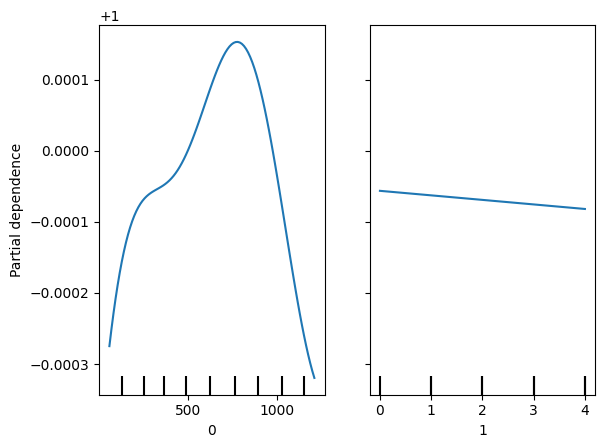

In [49]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'clf' is your trained SVM model
features = [0, 1]  # Select two features to visualize
# Get unique feature names (assuming X is a pandas DataFrame)
feature_names = list(X.columns)  # Get feature names directly from DataFrame columns

# Check for and remove duplicate feature names
unique_feature_names = []
for name in feature_names:
    if name not in unique_feature_names:
        unique_feature_names.append(name)

PartialDependenceDisplay.from_estimator(clf, X, features, feature_names=unique_feature_names)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix # Correct the module name to 'sklearn'

In [44]:
acc = accuracy_score(Y_train,Y_pred_train)
print("accuracy:" ,acc1.round(2) )
print('precision:' ,precision_score(Y_train,Y_pred_train,average='weighted').round(2))
print('recall:' ,recall_score(Y_train,Y_pred_train,average='weighted').round(2))

accuracy: 63.82
precision: 0.4
recall: 0.63


**Questions**


SVM is a versatile and powerful tool for classification tasks in various real-world applications, especially when dealing with high-dimensional data or complex decision boundaries. However, its effectiveness depends on careful tuning and understanding of the specific problem domain.


->text classification and spam detection



->image recognition and computer vision



->bioinformatics



->financial fraud detection



->customer segmentation and targeting



->medical diagnosis



->speech and voice recognition



->sentiment analysis



->time series forecasting



->anomaly detection